# Notebook for checking latency

In [1]:
# each actor gets there own latency dataframe to check the time of the run step
# concatenate frames together to get total latency for a given frame 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# with spike counts included

In [3]:
gen_df = pd.read_pickle("../latency/generator_latency.pkl")
processor_df = pd.read_pickle("../latency/processor_latency.pkl")
viz_df = pd.read_pickle("../latency/visual_latency.pkl")
pattern_df =  pd.read_pickle("../latency/pattern_latency.pkl")
model_df =  pd.read_pickle("../latency/model_latency.pkl")

## Generator Latency

In [4]:
x = list(gen_df["frame number"])
y = list(gen_df["latency"])

In [5]:
print(sum(y) / len(y))

0.7740720989010982


Text(0.5, 1.0, 'Generator Latency')

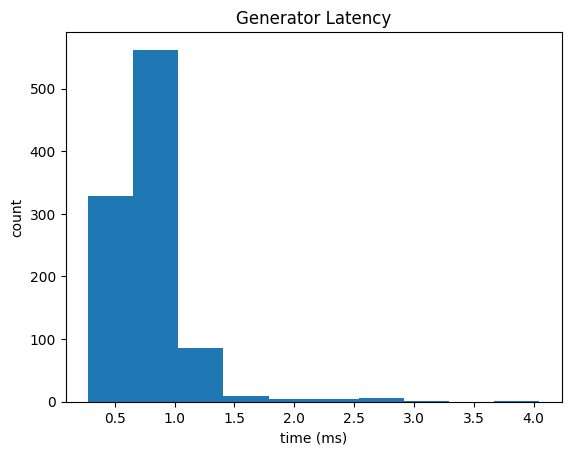

In [6]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Generator Latency")

## Processor Latency

In [8]:
x = list(processor_df["frame number"])
y = list(processor_df["latency"])

In [9]:
print(sum(y) / len(y))

5.82022735728953


Text(0.5, 1.0, 'Processing Time')

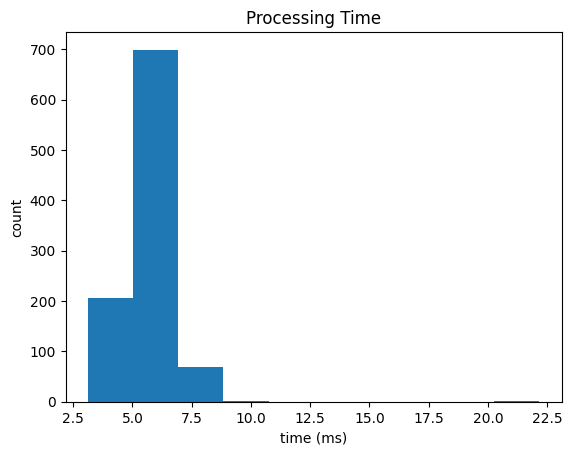

In [10]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Processing Time")

## Visual Latency

In [11]:
x = list(viz_df["frame number"])
y = list(viz_df["latency"])

In [12]:
print(sum(y) / len(y))

0.8353091776180696


Text(0.5, 1.0, 'Visual Latency')

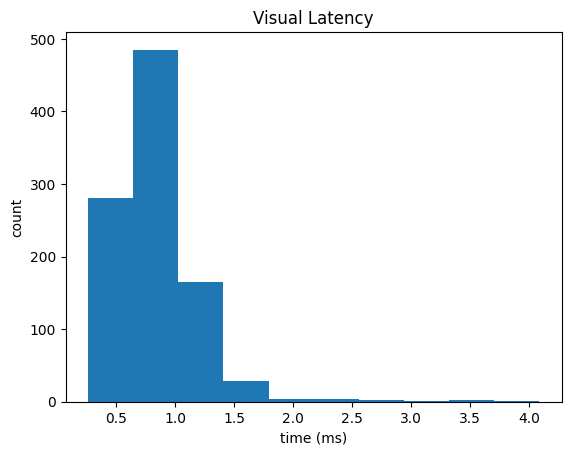

In [13]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Visual Latency")

## Pattern Generation Latency

In [14]:
x = list(pattern_df["frame number"])
y = list(pattern_df["latency"])

In [15]:
print(sum(y) / len(y))

0.2115192802874746


Text(0.5, 1.0, 'Pattern Generation Latency')

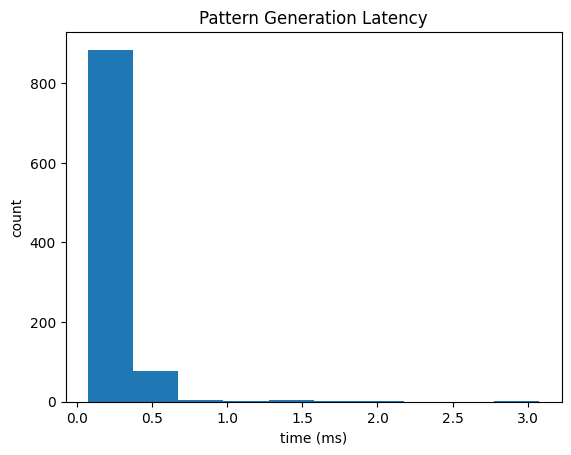

In [16]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Pattern Generation Latency")

## Model Latency

In [17]:
x = list(model_df["frame number"])
y = list(model_df["latency"])

In [18]:
print(sum(y) / len(y))

1.0459433059548249


Text(0.5, 1.0, 'Model Latency')

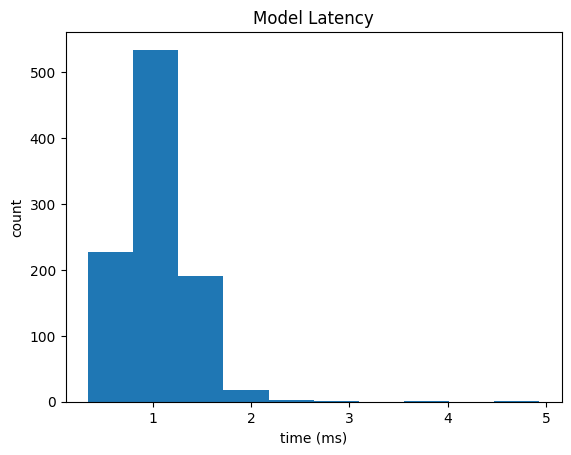

In [19]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Model Latency")

## Total Latency

In [20]:
gen_y = list(gen_df["latency"])[27:]

In [21]:
proc_y = list(processor_df["latency"])[27:]

In [22]:
viz_y =  list(viz_df["latency"])[27:]

In [23]:
pattern_y = list(pattern_df["latency"])[27:]
model_y = list(model_df["latency"])[27:]

In [24]:
total_latency = [x + y + z + a + b for x, y, z, a, b in zip(gen_y, proc_y, viz_y, pattern_y, model_y)]

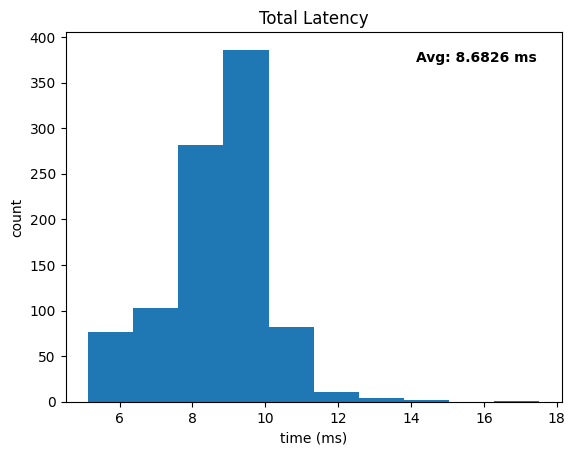

In [39]:
plt.hist(total_latency)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Total Latency")

avg_latency = round(sum(total_latency) / len(total_latency), 4)
ax = plt.gca()
plt.text(0.95, 0.95, f'Avg: {avg_latency} ms', 
         transform=ax.transAxes, 
         ha='right', va='top',
         fontsize=10, fontweight='bold')

plt.show()

In [26]:
sum(total_latency) / len(total_latency)

8.682589704329468

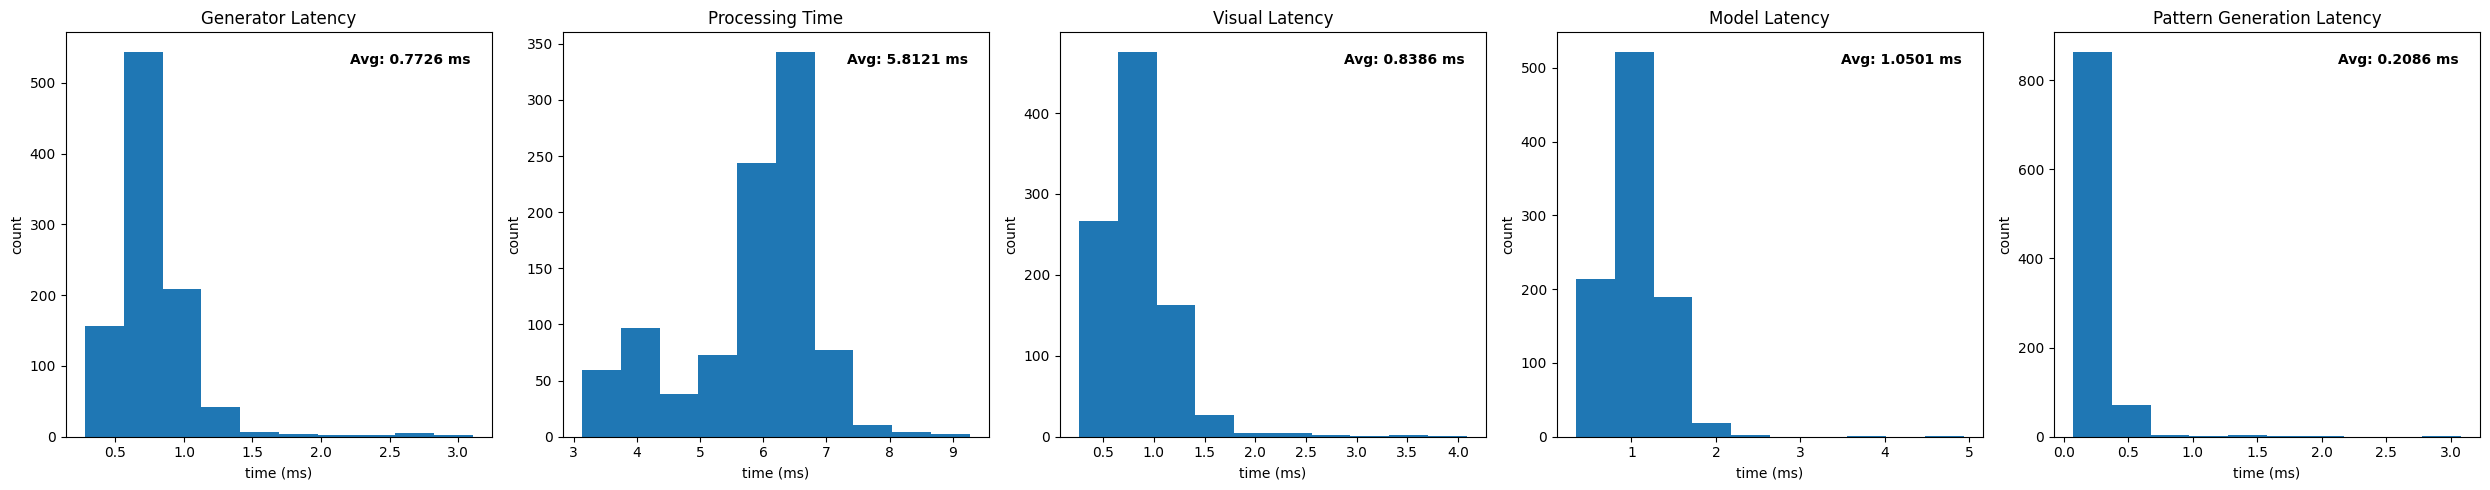

In [36]:
# Create a row of 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 row, 5 columns

titles = ["Generator Latency", "Processing Time", "Visual Latency", "Model Latency", "Pattern Generation Latency"]

ys = [gen_y, proc_y, viz_y, model_y, pattern_y]

for i in range(5):
    axes[i].hist(ys[i])
    axes[i].set_xlabel("time (ms)")
    axes[i].set_ylabel("count")
    axes[i].set_title(titles[i])

    axes[i].text(0.95, 0.95, f'Avg: {round(sum(ys[i]) / len(ys[i]), 4)} ms', 
             transform=axes[i].transAxes, 
             ha='right', va='top',
             fontsize=10, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()